### Homework 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import astropy

#### Problem 1
From elementary statistics, you know that the standard deviation of the mean of $N$ points drawn from a gaussian distribution is $\frac{\sigma}{\sqrt{N}}$, where $\sigma$ is the standard deviation of the parent population. Please write a python program to demonstrate this with, for example, 1000 realizations of a gaussian distribution of 10000 numbers.  Use the np.random.rand() function in numpy to produce the gaussian distribution.  Plot a histogram of the means.

In [2]:
#np.random.normal(mean, standard deviation, sample)
normaldist1 = np.random.normal(0,1,(10000,10000))   #Make a tuple (n,m) to make n samples of m numbers

In [3]:
#axis = 0 means to take the mean of the rows, axis = 1 means to take the mean of the columss
mean1 = np.mean(normaldist1, axis = 1)

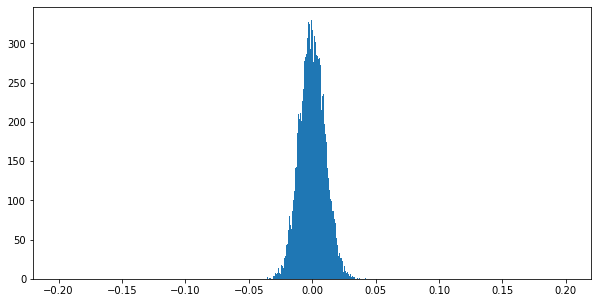

In [4]:
plt.figure(figsize=(10,5))
plt.hist(mean1, bins= 500, range=[-0.2,0.2]);

#### Problem 2 
##### Part (a) 
It is common in astronomy to combine a set of numbers with a median instead of a mean.  Curiously, the median is a "noisier" statistic than the mean.  Modify your program to compute the standard deviation of the median of a gaussian distribution. Plot a histogram of the medians.  Plot the histogram of the means and overplot the histogram of the medians.  There are various ways to plot both in the same panel, take your pick.

In [5]:
normaldist2 = np.random.normal(0,2,(10000,10000))  

In [6]:
mean2 = np.mean(normaldist2,axis = 1)
median2 = np.median(normaldist2,axis = 1)

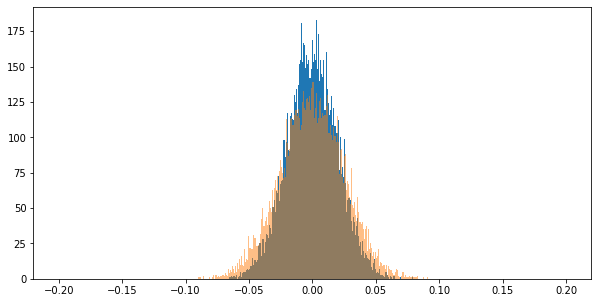

In [7]:
plt.figure(figsize=(10,5))
plt.hist(mean2, bins= 500, range=[-0.2,0.2]);
plt.hist(median2, bins= 500, range=[-0.2,0.2], alpha = 0.5);

##### Part (b) 
Calculate analytically the ratio of the two previous answers - i.e. by what factor is the stdev of the median larger than the stdev of the mean?

In [24]:
sigma_mean2 = np.std(mean2)
sigma_median2 = np.std(median2)
print("Standard deviation of mean:" + np.str(sigma_mean2))
print("Standard deviation of median:" + np.str(sigma_median2))

Standard deviation of mean:0.019894612800531637
Standard deviation of median:0.02519837608004553


In [25]:
ratio = sigma_mean2 / sigma_median2
print("Mean to median ratio:" + np.str(ratio))

Mean to median ratio:0.7895196395725708


#### Problem 3
On a different topic, write a function called "points" that take one parameter, $N$, returns an image with $N$ points drawn from a Gaussian centered at the center of the image. Use plot range $[-6,6]$ in both dimensions, and $\sigma=1$ for the gaussian. This will "simulate" photons from a star hitting a detector. Now add a sky background that also has $N$ photons with a uniform spatial distribution (so use np.random.random() but scale it so it goes $[-6,6]$ instead of $[0,1]$). Run the program for N=1000 or several thousand. Show the image you populate with these "photons" with plt.imshow() (or whatever). 

In [83]:
def points(N):
    image = np.zeros((100,100))
    x = np.random.normal(0,1,N)
    y = np.random.normal(0,1,N)
    ix = x*10 + 50
    iy = y*10 + 50
    for i in np.arange(N):
        image[int(ix[i]),int(iy[i])] += 1
    bx = np.random.uniform(0, 100, N)
    by = np.random.uniform(0, 100, N)
    for i in np.arange(N):
        image[int(bx[i]),int(by[i])] += 1
    return plt.imshow(image, vmin=0, vmax=100, cmap = 'gray')

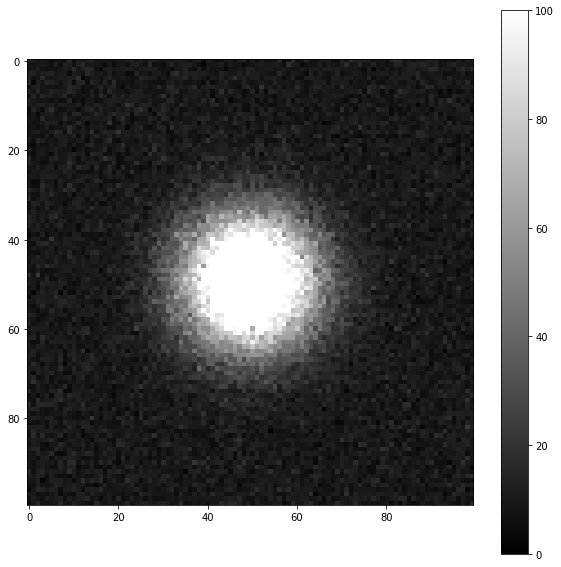

In [84]:
plt.figure(figsize=(10,10))
points(100000)
xlim = [-6,6]
ylim = [-6,6]
plt.colorbar()